In [ ]:
Go to this given URL and solve the following questions

URL: https://www.youtube.com/@PW-Foundation/videos

In [17]:
import requests
from bs4 import BeautifulSoup
from pandas import DataFrame
from json import loads


url = 'https://www.youtube.com/@PW-Foundation/videos'

# Get the html by get method
r = requests.get(url)
print(r)

# Create BeautifulSoup object
soup = BeautifulSoup(r.text, 'html.parser')
all_script_tags = soup.findAll('script')

<Response [200]>


In [18]:
def script_tag_to_json(tags: list) -> dict:
    for tag in reversed(tags):
        text: str = tag.text
        if 'ytInitialData = {"responseContext"' in text:
            return loads(text[20:-1])

    raise ValueError('Required script tag not found in the given tags.')

In [19]:
data = script_tag_to_json(all_script_tags)

#Return data from videos
def get_contents_dict(data):
    return data['contents']['twoColumnBrowseResultsRenderer']['tabs'][1]['tabRenderer']['content']['richGridRenderer']['contents']

### Q1. Write a python program to extract the video URL of the first five videos.

In [20]:
def get_videoUrl(data:dict, n: int = 5):
    contents = get_contents_dict(data)

    if n > 30:
        raise ValueError('Max Limit is 30.')

    result = []
    for i in range(n):
        result.append('https://www.youtube.com/watch?v=' +
                      contents[i]['richItemRenderer']['content']['videoRenderer']['videoId'])

    return result

get_videoUrl(data)

['https://www.youtube.com/watch?v=PI1obes98Zc',
 'https://www.youtube.com/watch?v=16fUsD0M1-I',
 'https://www.youtube.com/watch?v=S0RySN5arvk',
 'https://www.youtube.com/watch?v=HzBhwxMrt8A',
 'https://www.youtube.com/watch?v=60_B3haKADw']

### Q2. Write a python program to extract the URL of the video thumbnails of the first five videos.

In [21]:
def get_thumbnails(data: dict, n: int = 5):
    contents = get_contents_dict(data)

    if n > 30:
        raise ValueError('Max Limit is 30.')

    result = []
    for i in range(n):
        result.append(contents[i]['richItemRenderer']['content']['videoRenderer']['thumbnail']['thumbnails'][-1]['url'])

    return result

get_thumbnails(data)

['https://i.ytimg.com/vi/PI1obes98Zc/hqdefault.jpg?sqp=-oaymwEjCNACELwBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLCmDshrYrFfclOymZmlDi79xYzKMA',
 'https://i.ytimg.com/vi/16fUsD0M1-I/hqdefault.jpg?sqp=-oaymwEjCNACELwBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLDSdB3RrY_91M4wFdU8WorfjHTrGA',
 'https://i.ytimg.com/vi/S0RySN5arvk/hqdefault.jpg?sqp=-oaymwEjCNACELwBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLAMklN-udq5wIHmAyDjx4yd4HxvGg',
 'https://i.ytimg.com/vi/HzBhwxMrt8A/hqdefault.jpg?sqp=-oaymwEjCNACELwBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLDhGQyUAc5A_0sapaGDI_uDE_GNrg',
 'https://i.ytimg.com/vi/60_B3haKADw/hqdefault.jpg?sqp=-oaymwEjCNACELwBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLCz1LFTtDzJooWDMArb4Qfh74PC_w']

### Q3. Write a python program to extract the title of the first five videos.

In [22]:
def get_title(data: dict, n:int = 5):
    contents = get_contents_dict(data)

    if n > 30:
        raise ValueError('Max Limit is 30.')

    result = []
    for i in range(n):
        result.append(contents[i]['richItemRenderer']['content']['videoRenderer']['title']['runs'][-1]['text'])

    return result

get_title(data)

['How to score 95%+ in class 10th? Complete year Powerful Strategy!!',
 'Last 4 Days Left For SST Exam || How To Manage to Score 80/80 in Boards || Class-10th',
 'Benefits of Choosing Commerce After 10th | Commerce क्यों लेना चाहिए? | CBSE | ICSE | State Boards',
 'Complete 𝗖𝗔𝗥𝗕𝗢𝗡 𝗔𝗡𝗗 𝗜𝗧𝗦 𝗖𝗢𝗠𝗣𝗢𝗨𝗡𝗗𝗦 in 90 Minutes | Class 10th Board Exam',
 'Complete 𝗠𝗘𝗧𝗔𝗟𝗦 & 𝗡𝗢𝗡 𝗠𝗘𝗧𝗔𝗟𝗦  in 120 Minutes | Class 10th Board Exam']

### Q4. Write a python program to extract the number of views of the first five videos.

In [25]:
def get_viwes(data: dict, n: int = 5):
    contents = get_contents_dict(data)

    if n > 30:
        raise ValueError('Max Limit is 30.')

    result = []
    for i in range(n):
        result.append(int(contents[i]['richItemRenderer']['content']['videoRenderer']['viewCountText']['simpleText']
                      [:-6].replace(',', '')))

    return result

get_viwes(data)

[176624, 68281, 28143, 42238, 23112]

### Q5. Write a python program to extract the time of posting of video for the first five videos.

In [26]:
def get_time_of_posting(data: dict, n: int = 5):
    contents = get_contents_dict(data)

    if n > 30:
        raise ValueError('Max Limit is 30.')

    result = []
    for i in range(n):
        result.append(contents[i]['richItemRenderer']['content']['videoRenderer']['publishedTimeText']['simpleText'])

    return result

get_time_of_posting(data)

['9 days ago', '9 days ago', '2 weeks ago', '2 weeks ago', '2 weeks ago']

## Create CSV File

In [29]:
def get_channel_video_details(data: dict, n: int):
    thumbnails = get_thumbnails(data, n)
    time_of_posting = get_time_of_posting(data, n)
    titles = get_title(data, n)
    video_urls = get_videoUrl(data, n)

    main_data = list(zip(video_urls, titles, thumbnails, time_of_posting))
    
    df = DataFrame.from_dict(main_data)
    df.rename(
        columns={
            0: 'video_urls',
            1: 'title',
            2: 'thumbnail_url',
            3: 'time_of_posting'
        }, inplace=True)

    return df

channel_data = get_channel_video_details(data, 5)
channel_data.to_csv('PW-Foundation_yt.csv', index=False)

### Screen Shot of CSV File

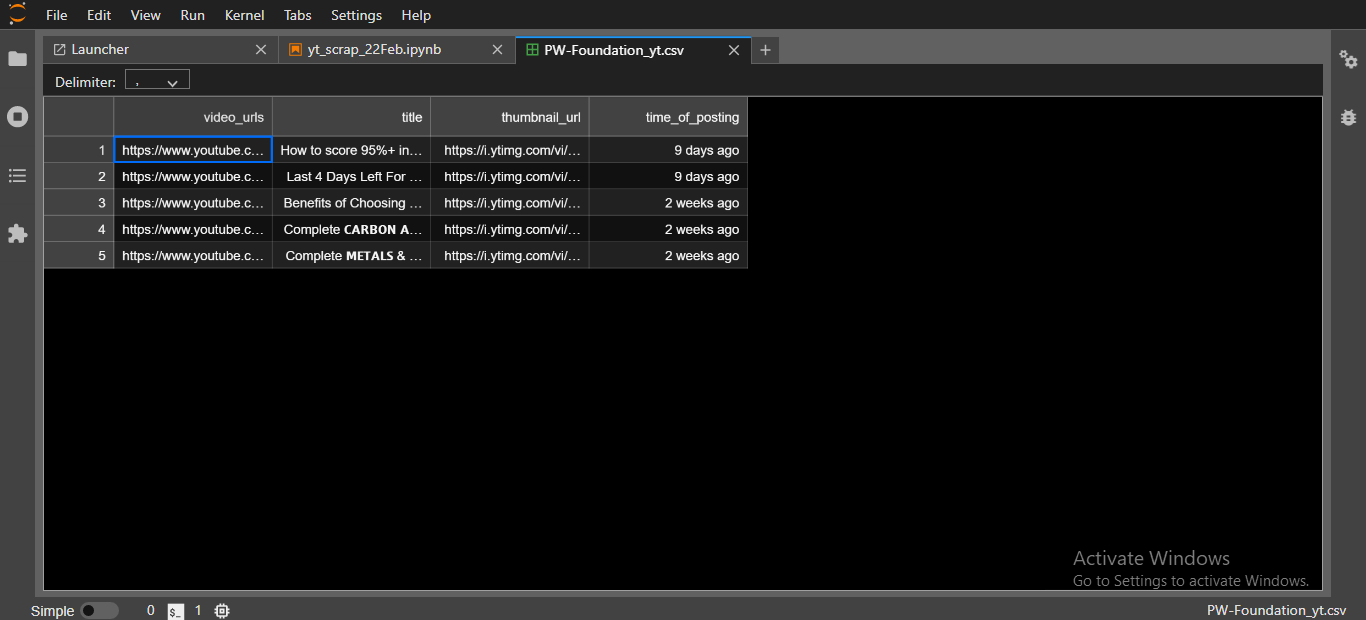

### Screen shot of UI

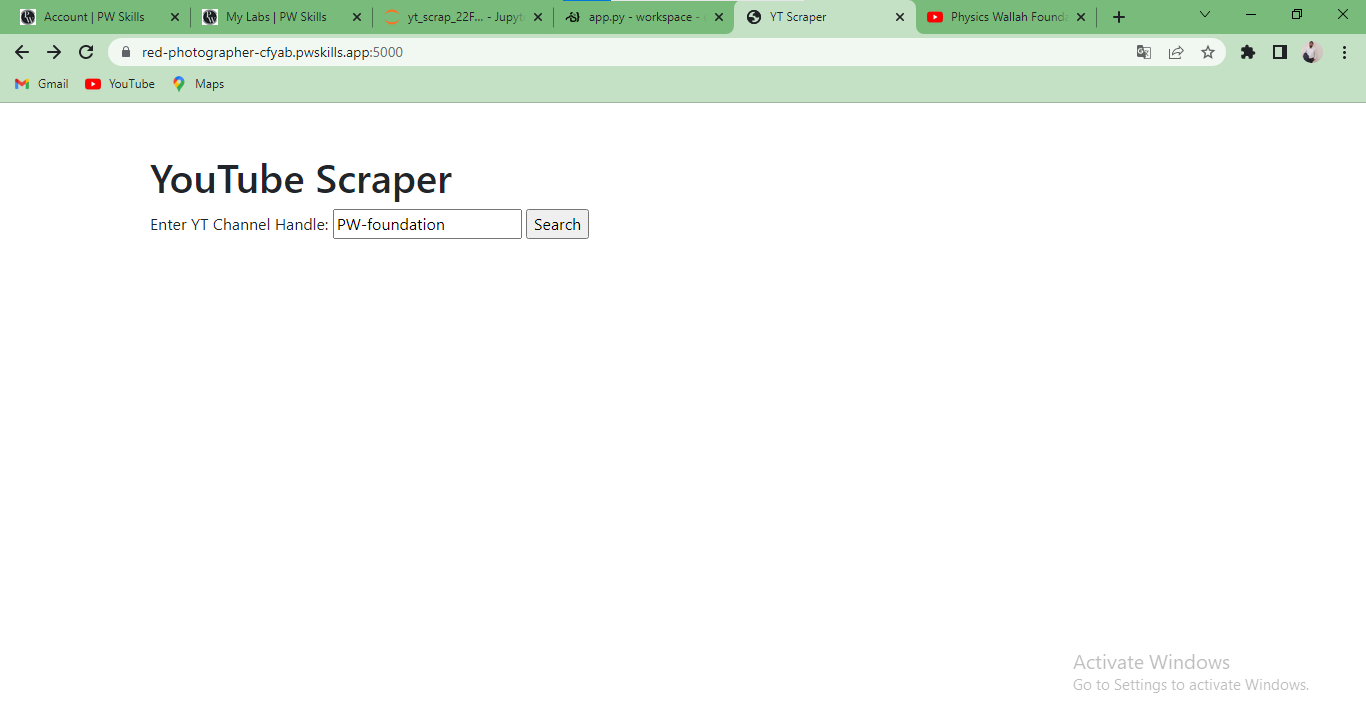

### Screen Shot of UI Result

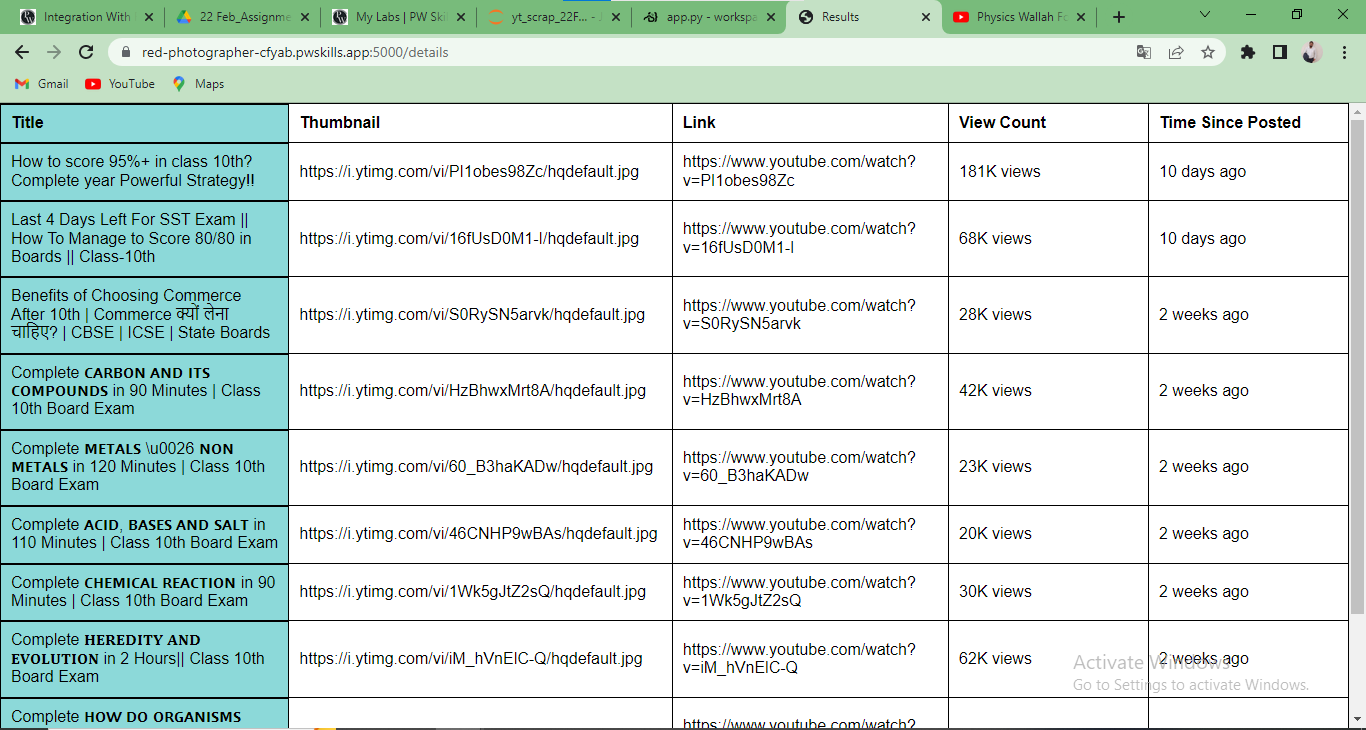

#### As I don't have credit card and not in my family, so I couldn't create an account on AWS and deploy it on AWS. 
#### Please Consider it while evaluating and assigning marks.